In [2]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [3]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [6]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [9]:
# ваш код
# cначала определяем средние температуры, затем выбираем
result = df.groupby(pd.Grouper(key="Day", freq="Y"))['t'].mean()
print('cамый холодный год:', result.idxmin().year)
print('cамый теплый год:  ', result.idxmax().year)

cамый холодный год: 2012
cамый теплый год:   2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [14]:
# ваш код
# сначала навешиваем ограничение на температуру, затем определяем январские дни, затем сичтаем по кол-ву дней
january = df[df.t >= 0]
january = january[january.Day.dt.month == 1]
result = january.groupby(pd.Grouper(key="Day", freq="Y"))['t'].count()
print('год, где в январе было наибольшее число дней с положительной температурой:', result.idxmax().year)

год, где в январе было наибольшее число дней с положительной температурой: 2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [18]:
# ваш код
# сначала определяем лето, затем средние температуры и выбираем минимальное
summer = df[(df.Day.dt.month >= 6) & (df.Day.dt.month <= 8)]
result = summer.groupby(pd.Grouper(key="Day", freq="Y"))['t'].mean()
print('год, где самое холодное лето:',result.idxmin().year)

год, где самое холодное лето: 2008


**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [47]:
# ваш код
day = df['t'].diff().dropna().argmin()
print('день с самой большим перепадом температуры, если сравнивать со следующим днем:', str(df.Day[day].date()))

день с самой большим перепадом температуры, если сравнивать со следующим днем: 2014-05-26


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

Text(0, 0.5, 'средняя температура за год')

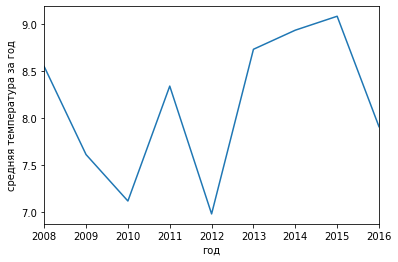

In [5]:
# ваш код
df.groupby(pd.Grouper(key="Day", freq="Y"))['t'].mean().plot()
plt.xlabel('год')
plt.ylabel('средняя температура за год')